# **Visualización para análisis exporatorio**
# AE01. Introducción a Matplotlib

## <font color='blue'>__Introducción__</font>

O más bien dicho: como graficar utilizando Python y no morir en el intento

- Matplotlib surge como una librería para hacer gráficos estilo [MATLAB](https://la.mathworks.com/products/matlab.html) el 2003.
- Pertenece al ecosistema de computación científica de [SciPy](https://www.scipy.org/)
- Código abierto, licencia tipo [BSD](https://es.wikipedia.org/wiki/Licencia_BSD)
- Principalmente los gráficos son en 2D, pero incluye una interfaz rudimentaria para generar gráficos 3D.

<center><img src="https://drive.google.com/uc?id=1IB0uBd1pBBEAcEk-LTsPzw484mHk6iRG">
</center>
<center><img src="https://drive.google.com/uc?id=1qcBfFRIr_R_J5LQ--gKQ78FQnI1Y7Rbs">
</center>




### __Un ejemplo práctico del uso de matplotlib (mostrando sus potencialidades)__

La imagen de un agujero negro captado por múltiples telescopios y procesado con matplotlib [(Enlace al repositorio de código en github)](https://github.com/achael/eht-imaging):

<img src="https://drive.google.com/uc?id=1P_H1fcmgdpQ0QX1N2_tfdBK4BXcDso2N">


Esto fue posible gracias a la investigación de la Dr. Katie Boumann y el equipo involucrado en el desarrollo de la librería [(Charla Ted relacionada)](https://www.youtube.com/watch?v=BIvezCVcsYs)

<img src="https://drive.google.com/uc?id=1MzSZdrWopdLvZ4r86QI6DaGyVLNBt5hW">


## <font color='blue'>__¿Cómo empezamos a trabajar con matplotlib?__</font>

### A. Trabajo en modo local
En este caso, la recomendación va por instalar la distribución de Python [Anaconda](https://www.anaconda.com/products/individual), la cual viene con un conjunto de librerías preinstaladas para computación científica y Data Science. Con esto la instalación y/o actualización de esta librería puede realizar con cualquiera de estos dos simples comandos:

1.- Utilizando el gestor de paquetes de Anaconda
```bash
conda install matplotlib
```
2.- Utilizando el gestor de paquetes de Python (pip)
```bash
pip install matplotlib
```
### B. Trabajo desde la nube
En otros entornos de computación en la nube (por ejemplo __Google Colab__), matplotlib y todo el stack de scipy viene preinstalado. Asegúrate de ejecutarlo desde un navegador __Chrome__ actualizado a la última versión.

Una vez instalado, para poder empezar a graficar necesitamos importar la librería, específicamente el módulo `pyplot` y luego activar el **backend** de jupyter, utilizando los siguientes comandos en una celda:

```python
import matplotlib.pyplot as plt # Este es el "alias" tradicional para matplotlib
%matplotlib inline # Este 'comando mágico' activa el backend para jupyter, mostrando los gráficos en las mismas celdas del notebook.
```

__pyplot__ es una API que implementa un estilo de trabajo similar al que nos entrega MATLAB.

## <font color='blue'>__¿Qué es el backend?__</font>

Para dar respuesta a esto, vamos a analizar los componentes de matplotlib, los cuales se dividen en tres capas:

<center><img src="https://drive.google.com/uc?id=1snWRU957X9aRbk2DFRKICfGBGr1JWFoQ"></center>


### __1.- Capa del Backend (Backend Layer)__

El backend corresponde al componente donde se va a generar la imagen, y por consiguiente nos permite renderizar las instrucciones que nosotros programamos mediante Python. Existen múltiples backend, los cual permiten exportar las imágenes generadas en distintos formatos (PNG, JPG, PDF, entre otros). Específicamente, el backend está compuesto por tres elementos:

- __FigureCanvas__: Área donde el gráfico se va a dibujar.
- __Renderer__: La herramienta utilizada para dibujar en FigureCanvas.
- __Event__: Maneja entradas provenientes de los usuarios (clicks de mouse, teclas presionadas en el teclado, etc.).

Una analogía para cada uno de estos componentes corresponde a:
<br><br>
<center> <b>FigureCanvas es nuestro papel,<br>
Render es nuestro pincel,<br>
Event son instrucciones de alguien sobre que dibujar</b>
</center>
<br><br>

### __2.- Capa del artista (Artist Layer)__

La idea detrás de la capa del artista, es controlar todos los posibles elementos existentes en las figuras. Cada elemento existente va a ser un objeto de Python con sus posibles propiedades, y objetos hijos. Por lo mismo, la capa del artista se le conoce como la **la interfaz de Orientación de Objetos**.
- Cada elemento del gráfico es un elemento artista, el cual puede estar compuesto por varios artistas a su vez. Ejemplo de esto se presentan en las siguientes figuras:

<center><img src="https://drive.google.com/uc?id=1h3Bm6YZq9snHJJQjPxbhluVuCejoP7sx"></center>


### __3.- Capa de Scripting (Scripting Layer)__

Esta corresponde a la interfaz más sencilla para realizar gráficos de matplotlib. La idea es graficar lo más parecido a MATLAB, donde con pocas líneas de código se automatiza todo el proceso de la capa del artista. Utilizando esta capa de scripting, las pocas líneas de código son capaces de generar todos los artistas y la jerarquía existente entre ellos de forma sencilla, e inclusive permite rescatar un artista específico para hacer modificaciones si es que corresponde. Finalmente, para poder utilizar esta capa de scripting simplemente tenemos que llamar a `pyplot` (o en su defecto, el alias `plt`)

Veamos un ejemplo de graficar con la capa de artista, versus graficar con la capa de scripting:


In [1]:
import matplotlib.pyplot as plt # mportamos la librería

# Importamos pandas y numpy para aprovechar las capacidades númericas y de manejo de datos de ambas librerías
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
# Verifiquemos la versión que utiliza Colab
import matplotlib
matplotlib.__version__

'3.7.1'

Utilizando `numpy`, vamos a generar un arreglo con $20000$  puntos aleatorios obtenidos de una distribución normal y lo vamos a guardar en la variable `x`

In [4]:
x = np.random.randn(20000)

## <font color='blue'>__Graficando con la capa Artista__</font>

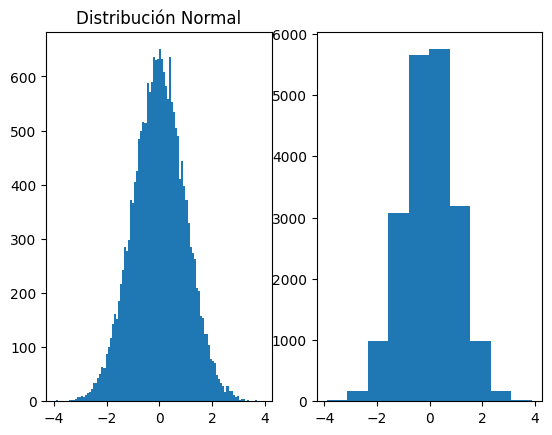

In [5]:
# Instanciamos el Artista "Figura"
fig = plt.figure()

# Generamos un eje de la figura, especificamente se genera 1 eje (Axis),
# con 1 fila y 1 columna (111)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# Ocupamos el Artista ax, para pintar un histograma con 100 bins
ax1.hist(x, 100)
ax2.hist(x, 10)
# Añadimos el titulo al eje ax
ax1.set_title('Distribución Normal')
# Mostramos la figura
plt.show()

## <font color='blue'>__Graficando con la capa Scripting__</font>

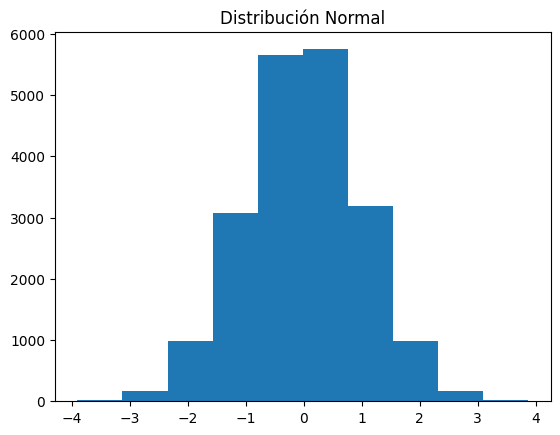

In [6]:
# llamamos a plt.hist, basicamente instanciamos un histograma,
# e implicitamente, se genera internamente un eje
plt.hist(x, 10)

# A dicho eje, le añadimos el titulo
plt.title('Distribución Normal')

# Mostramos la figura
plt.show()

## <font color='blue'>__Anatomía de un gráfico de matplotlib__</font>

Cada uno de estos elementos es un artista, el cual podemos modificar según nuestras necesidades.


<center><img src="https://drive.google.com/uc?id=1k1K2AazmaAf-P1UetiffDIGzTW-2BXGh"></center>

<img src="https://drive.google.com/uc?export=view&id=1Igtn9UXg6NGeRWsqh4hefQUjV0hmzlBv" width="100" align="left" title="Runa-perth">
<br clear="left">
Contenido opcional

### __Lecturas adicionales__

- [Partes de una figura](https://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)
- [La arquitectura de Matplotlib](https://www.aosabook.org/en/matplotlib.html)
<br>
<br>

<img src="https://drive.google.com/uc?export=view&id=1Igtn9UXg6NGeRWsqh4hefQUjV0hmzlBv" width="50" align="left" title="Runa-perth">


##  <font color='blue'>__Gráficos básicos con matplotlib: Diagramas de líneas (Line plots)__</font>

Realicemos un "hola mundo", las primeras líneas necesarias para generar un gráfico de línea:

```python
plt.plot(x, y, *args) # Generamos un gráfico
plt.show() # Imprimimos el gráfico por pantalla
```

La estructura que utiliza la capa de scripting tiene dos elementos principales: la entrada `x` e `y`. Específicamente ambas variables deben ser arreglos unidimensionales detallando claramente: los valores para cada par $(x,y)$. Por lo mismo las dimensiones de ambos arreglos tiene que ser iguales, de lo contrario se va a levantar un `exception` debido a la diferencia de largo de arreglos.

Finalmente, `*args` hace mención a que dicha función `plot`, recibe más parámetros los cuales pueden modificar el comportamiento de lo que se está graficando. Si se omiten estos parámetros y si solo se detalla los valores de `x` e `y`, entonces matplotlib va a generar un gráfico de línea.

[Documentación del método plot](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.plot.html)

Ejemplo:


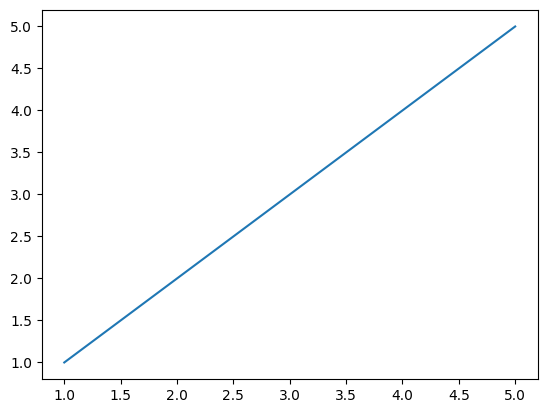

In [7]:
# Definimos el arreglo a gráficar
arr = [1, 2, 3, 4, 5]
# Ocupamos el método plot
plt.plot(arr, arr)
plt.show()

In [8]:
import plotly.graph_objects as go
import numpy as np

N = 100000
fig = go.Figure(data=go.Scattergl(
    x = np.random.randn(N),
    y = np.random.randn(N),
    mode='markers',
    marker=dict(
        color=np.random.randn(N),
        colorscale='Viridis',
        line_width=1
    )
))

fig.show()

Output hidden; open in https://colab.research.google.com to view.

### <font color='green'>Actividad 1:</font>

Grafiquemos una señal sinusoidal, en este caso nuestros valores de $x$ va a estar definido como:
$$x \in [0,10]$$

Y la variable $y$ se define como:

$$y = sin(x)$$

1. Utilizando `matplotlib` y `numpy` genere dicho gráfico
2. ¿Cómo podemos obtener una curva más suave?


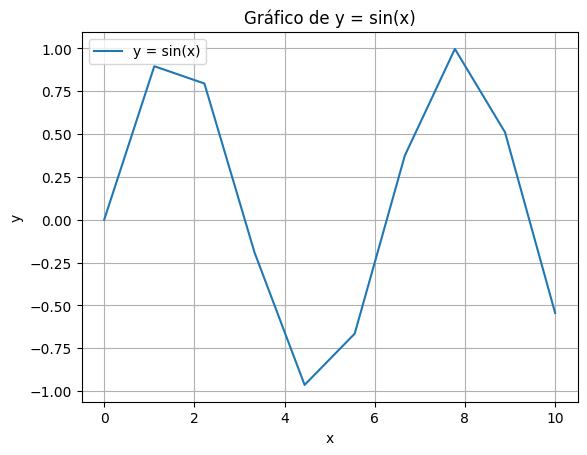

In [31]:
# Tu código aquí ...
import numpy as np
import matplotlib.pyplot as plt

# Paso 1: Generar los valores de x y y
x = np.linspace(0, 10, 10)  # Generamos 1000 puntos entre 0 y 10

y = np.sin(x)

# Paso 2: Graficar la función
plt.plot(x, y, label='y = sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de y = sin(x)')
plt.legend()
plt.grid(True)

# Paso 3: Mostrar el gráfico
plt.show()





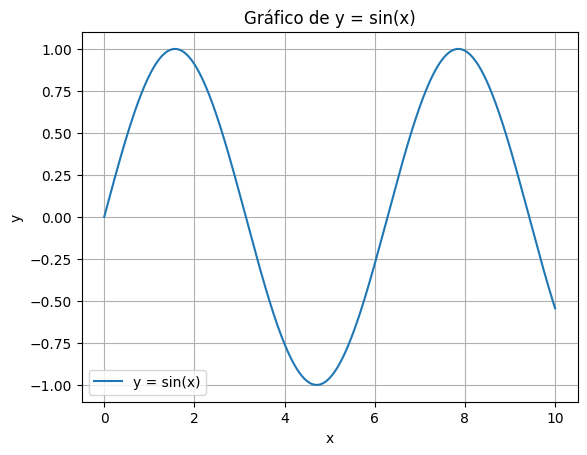

In [32]:
# Tu código aquí ...
import numpy as np
import matplotlib.pyplot as plt

# Paso 1: Generar los valores de x y y
 # Generamos 10000 puntos entre 0 y 10
x = np.linspace(0, 10, 1000)
y = np.sin(x)

# Paso 2: Graficar la función
plt.plot(x, y, label='y = sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de y = sin(x)')
plt.legend()
plt.grid(True)

# Paso 3: Mostrar el gráfico
plt.show()



<font color='green'>Fin Actividad</font>

### <font color='blue'>__Graficar múltiples datos__</font>

Cuando queremos graficar múltiples datos, por ejemplo: "hacer múltiples líneas en el mismo eje", podemos utilizar la siguiente sintaxis:

```python
plt.plot(x,y,*args) # Generamos Línea 1
plt.plot(x,y,*args) # Generamos Línea 2
...
plt.plot(x,y,*args) # Generamos Línea N

plt.show() # Imprimimos el gráfico por pantalla
```

Si nosotros llamamos múltiples veces instrucciones para graficar, el comportamiento que tomara matplotlib es graficar en la misma figura hasta que nosotros liberemos el backend.

Métodos que liberan el backend:

- `plt.show()`: Mostrar la figura
- `plt.close()`: Cerrar la figura, limpiando el backend

**Nota:** Al momento de utilizar el jupyter magic `%matplotlib inline`, al final de cada ejecución de celda se ejecutara una liberación del backend.

Ejemplo de graficar múltiples líneas:


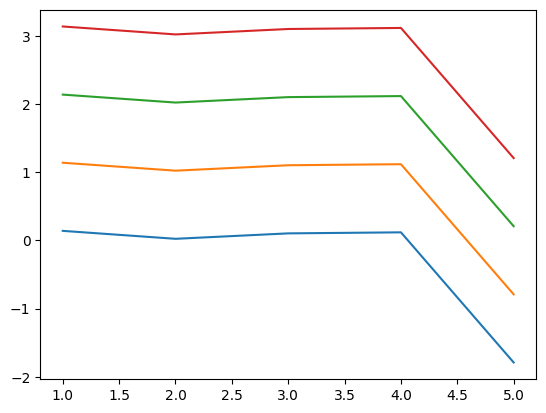

In [11]:
x = [1, 2, 3, 4, 5] # eje X
y1 = np.random.randn(5) # y1, obtenemos 5 números aleatorios
y2 = y1 + 1 # Vamos sumando 1 por cada línea que pintamos
y3 = y2 + 1
y4 = y3 + 1

# Ocupamos el método plot
plt.plot(x, y1) # Línea 1
plt.plot(x, y2) # Línea 2
plt.plot(x, y3) # Línea 3
plt.plot(x, y4) # Línea 4

plt.show()

### <font color='blue'>__Modificando las propiedades de un gráfico: Añadiendo una leyenda__</font>

Una forma básica para añadir la leyenda a nuestra visualización, corresponde a utilizar el método plt.legend(). Como argumento, este método recibe un arreglo con los nombres para cada uno de los elementos graficados (en este caso, las líneas).


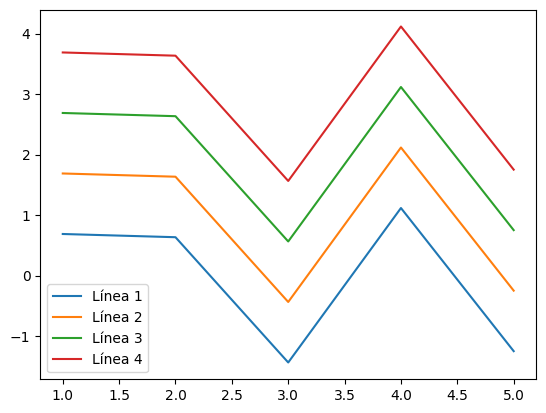

In [12]:
x = [1, 2, 3, 4, 5]
y1 = np.random.randn(5)
y2 = y1 + 1
y3 = y2 + 1
y4 = y3 + 1
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)

# Añadimos 4 Lineas a la leyenda, debido a que estamos gráficando las 4 líneas
plt.legend(["Línea 1", "Línea 2", "Línea 3", "Línea 4"])
plt.show()

Una forma alternativa, y detallada como una buena práctica por los desarrolladores de matplotlib, corresponde a asignarle una etiqueta a cada una de las líneas, para luego simplemente llamar al método legend. Este al no recibir ningún parámetro, va a buscar dentro de cada artista relacionado a la línea, el parámetro `label`

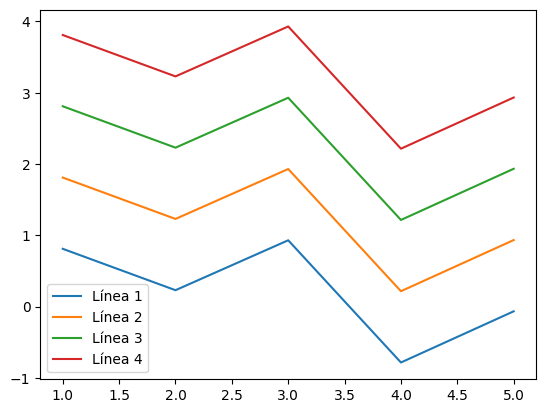

In [13]:
x = [1, 2, 3, 4, 5]
y1 = np.random.randn(5)
y2 = y1 + 1
y3 = y2 + 1
y4 = y3 + 1
# Añadimos argumentos de etiqueta ('label') a cada plot
plt.plot(x, y1, label='Línea 1')
plt.plot(x, y2, label='Línea 2')
plt.plot(x, y3, label='Línea 3')
plt.plot(x, y4, label='Línea 4')

plt.legend()
plt.show()

### <font color='blue'>__Modificando las propiedades de un gráfico: Añadiendo un título__</font>

Para añadir un título a nuestro gráfico, nosotros podemos utilizar el método `plt.title()`. En este caso, dicho método recibe como argumento un `String` el cual se va a pintar en la zona superior del gráfico. Recibe más parámetros los cuales pueden ver en la [documentación](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.title.html). Cabe detallar, es capaz de mostrar [**LaTeX**](https://es.wikipedia.org/wiki/LaTeX).


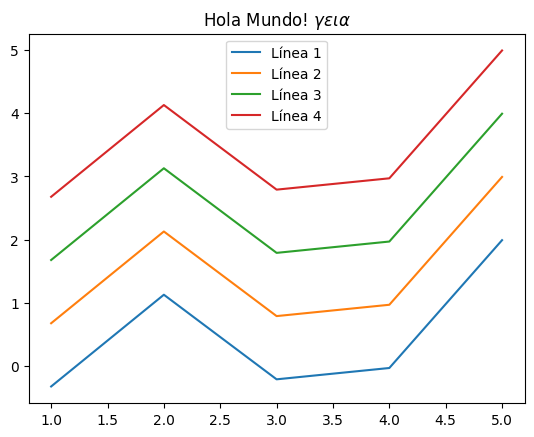

In [14]:
x = [1, 2, 3, 4, 5]
y1 = np.random.randn(5)
y2 = y1 + 1
y3 = y2 + 1
y4 = y3 + 1
plt.plot(x, y1, label='Línea 1')
plt.plot(x, y2, label='Línea 2')
plt.plot(x, y3, label='Línea 3')
plt.plot(x, y4, label='Línea 4')

plt.legend()
# Añadimos un título
plt.title("Hola Mundo! $\\gamma \\epsilon \\iota \\alpha$") # yeia es hola en griego
plt.show()

### <font color='blue'>__Modificando las propiedades de un gráfico: Añadiendo los títulos para los ejes__</font>

Para añadir títulos a los ejes X e Y, se utilizan los métodos `plt.xlabel` y `plt.ylabel` respectivamente. Los argumentos para cada método son similares a generar un título.

[Documentación xlabel](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.xlabel.html?highlight=xlabel#matplotlib.pyplot.xlabel)

[Documentación ylabel](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.ylabel.html?highlight=ylabel#matplotlib.pyplot.ylabel)


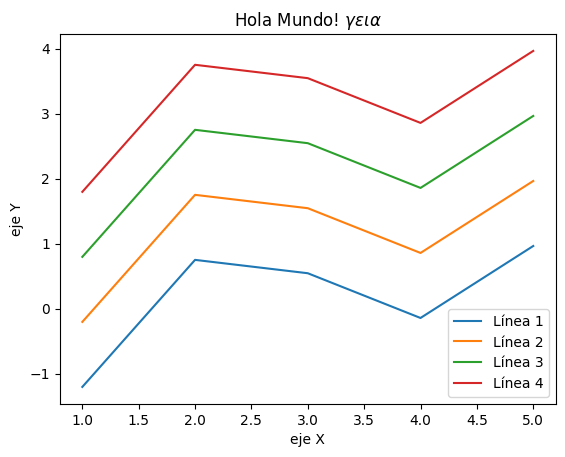

In [15]:
x = [1, 2, 3, 4, 5]
y1 = np.random.randn(5)
y2 = y1 + 1
y3 = y2 + 1
y4 = y3 + 1
plt.plot(x, y1, label='Línea 1')
plt.plot(x, y2, label='Línea 2')
plt.plot(x, y3, label='Línea 3')
plt.plot(x, y4, label='Línea 4')

plt.legend()
plt.title("Hola Mundo! $\\gamma \\epsilon \\iota \\alpha$")
# Añadimos nombres a los ejes
plt.xlabel("eje X")
plt.ylabel("eje Y")
plt.show()

### <font color='green'>Actividad 2:</font>

Grafiquemos dos señales, donde los valores de $x$ van a estar definido como: $x \in [-2\pi,2\pi]$ y con una resolución de $0.05$ entre cada valor

Y las variables $y$ se definen como:

$$y_1 = sin(x)$$
$$y_2 = cos(x)$$

utilizando `matplotlib` y `numpy` genere dicho gráfico. Además de esto, añada un título descriptivo de lo que se gráfica, títulos a los ejes y leyendas para cada una de las señales.

Pruebe otros tipos de funciones (como logaritmo, raíz n-ésima, potencia n-ésima, etc.)


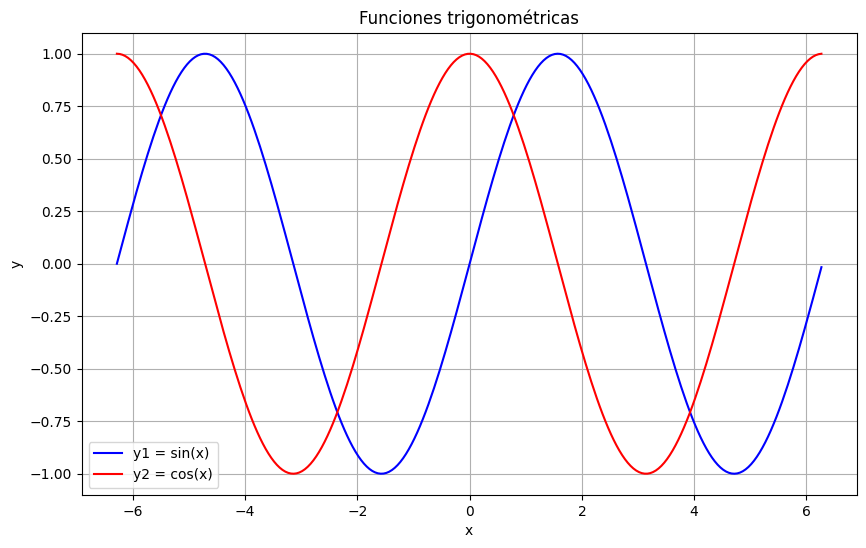

In [16]:
# Tu código aquí ...
import numpy as np
import matplotlib.pyplot as plt

# Paso 1: Generar los valores de x
x = np.arange(-2*np.pi, 2*np.pi, 0.05)

# Paso 2: Calcular y1 = sin(x) y y2 = cos(x)
y1 = np.sin(x)
y2 = np.cos(x)

# Paso 3: Graficar las funciones
plt.figure(figsize=(10, 6))  # Ajustamos el tamaño de la figura

# Graficar y1 = sin(x)
plt.plot(x, y1, label='y1 = sin(x)', color='blue')

# Graficar y2 = cos(x)
plt.plot(x, y2, label='y2 = cos(x)', color='red')

# Agregar etiquetas y título
plt.xlabel('x')
plt.ylabel('y')
plt.title('Funciones trigonométricas')

# Agregar leyendas
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()


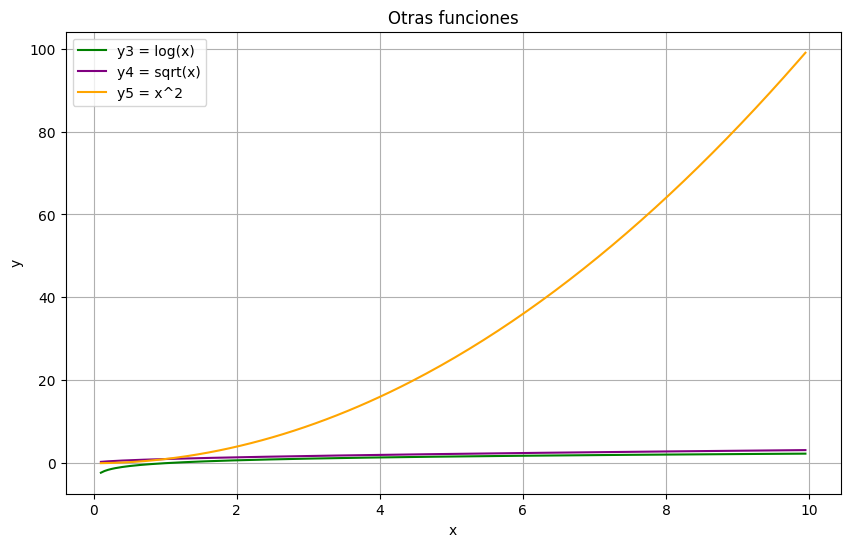

In [17]:
# Generar valores de x
x = np.arange(0.1, 10, 0.05)  # Evitamos x=0 para logaritmo

# Calcular y3 = log(x)
y3 = np.log(x)

# Calcular y4 = sqrt(x)
y4 = np.sqrt(x)

# Calcular y5 = x^2
y5 = x**2

# Graficar las nuevas funciones
plt.figure(figsize=(10, 6))

plt.plot(x, y3, label='y3 = log(x)', color='green')
plt.plot(x, y4, label='y4 = sqrt(x)', color='purple')
plt.plot(x, y5, label='y5 = x^2', color='orange')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Otras funciones')

plt.legend()
plt.grid(True)
plt.show()


<font color='green'>Fin Actividad 2</font>




## <font color='blue'>__Gráficos de Torta (Pie Charts)__</font>

Los gráficos de torta presentan la información en formas de proporciones en un eje circular. Para poder hacer un gráfico de torta tenemos que utilizar el método `plt.pie()`, el cual solo recibe los valores de $X$. Automáticamente, el método `plt.pie` va a calcular las proporciones y vamos a ver más adelante que al momento de generar etiquetas, estas quedan en formato de porcentajes. Aparte de esto, vamos a ver diversas formas de manipular la estética de este tipo de gráfico.

[Documentación Pie Charts](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.pie.html)

Ejemplos:


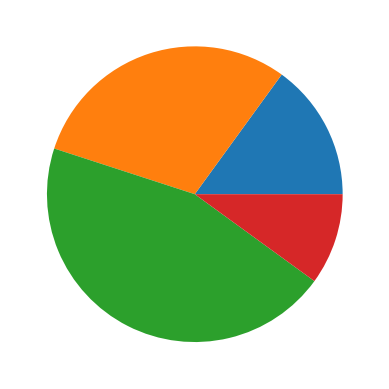

In [18]:
sizes = [15, 30, 45, 10] # Tenemos cuatro tamaños para distintos animales.

plt.pie(sizes) # Llamamos el método del Pie Chart
plt.show() # Mostramos el gráfico

Agregando etiquetas, utilizando el parámetro `labels`  (la cantidad de etiquetas tiene que ser igual a la cantidad de elementos en $X$)

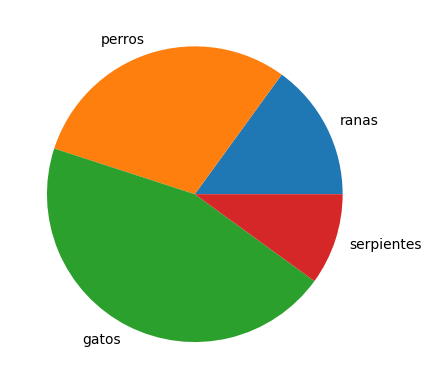

In [19]:
labels = ['ranas', 'perros',
          'gatos', 'serpientes']
plt.pie(sizes, labels=labels)
plt.show()

Agregando las etiquetas de porcentajes se utiliza el parámetro `autopct` el cual recibe un `String`. A modo de ejemplo, utilizamos "%.1f%%" el cual está compuesto por

- El primer "%" indica la transformación en porcentajes
- .1f indica que se utilizara un dígito decimal
- los últimos %% indican que imprima después de los dígitos el caracter "%".


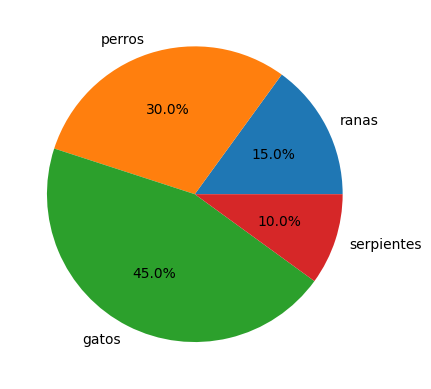

In [20]:
plt.pie(sizes, labels=labels,
        autopct='%.1f%%')
plt.show()

Finalmente, y a modo de ejemplo, podemos manipular una o más porciones del gráfico de torta, separándolo del resto de las porciones, para eso tenemos que utilizar el parámetro `explode`.  Este parámetro recibe una lista la cual contiene un porcentaje de separación desde el centro de la torta.

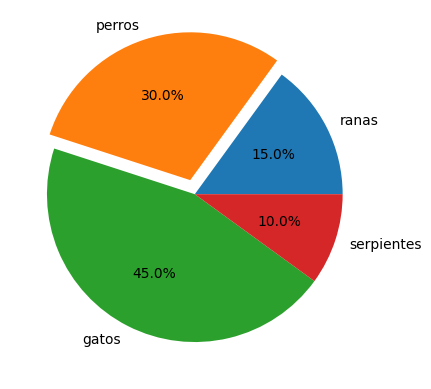

In [21]:
explode=[0, 0.1, 0, 0]
plt.pie(sizes, labels=labels,
        autopct='%1.1f%%',
        explode=explode)
plt.show()

## <font color='blue'>__Gráficos de Barra (Bar charts)__</font>

El gráfico de barras nos permite proyectar valores asociados a variables categóricas, en longitudes verticales u horizontales. Para realizar gráficos de barras en matplotlib, necesitamos utilizar el método `plt.bar`. Al igual que `plt.plot`, el método utilizado para los gráficos de barra reciben valores $X$ e $Y$.

[Documentación de gráficos de barra](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.bar.html?highlight=bar#matplotlib.pyplot.bar)

Veamos un ejemplo del promedio de puntajes en una prueba, para 5 grupos dividiendo en cada grupo entre hombres y mujeres:


In [22]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5'] # Las etiquetas, basicamente Grupo 1, Grupo 2, ..., Grupo 5
men_means = [20, 34, 30, 35, 27] # Los promedios de puntajes obtenidos para los hombres en cada grupo
women_means = [25, 32, 34, 29, 35] # Los promedios de puntajes obtenidos para las mujeres en cada grupo
x = np.arange(len(labels))  # Generaremos nuestro eje X, utilizando el método np.arange, según el largo de la etiqueta.

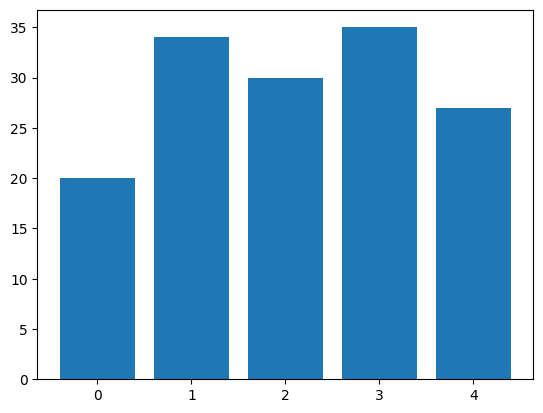

In [23]:
# Aquí graficamos el promedio de puntajes de los hombres para los distintos grupos.
plt.bar(x, men_means) # Luego es tan simple como llamar plt.bar(x,y)
plt.show() # mostramos la figura

Podemos manipular el mismo gráfico, modificando los anchos de las barras utilizando el parámetro `width` (el cual por defecto es 0.7). Aquí lo cambiaremos a la mitad (0.35):

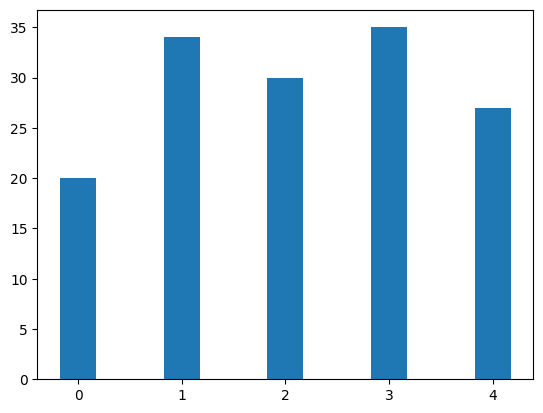

In [24]:
width = 0.35
rects1 = plt.bar(x, men_means,  # Nota como ordenamos hacia abajo los parámetros
                 width=width)
plt.show()

¿Qué pasaría si quisiésemos pintar los promedios de los hombres y las mujeres en el mismo gráfico?

Hagamos la prueba utilizando la misma lógica al pintar múltiples líneas con `plt.plot`:


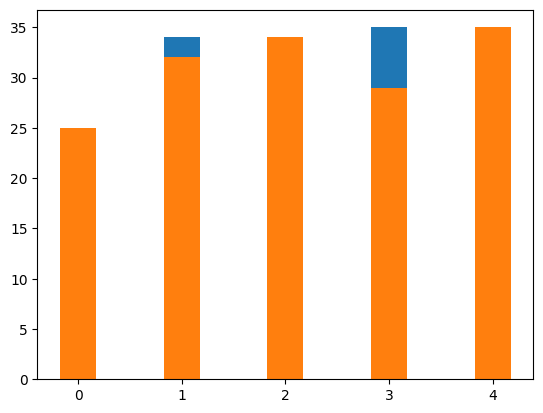

In [25]:
# Barras para los promedios de los hombres utilizando width declarado anteriormente
rects1 = plt.bar(x, men_means, width, label='Men')
# Barras para los promedios de las mujeres utilizando width declarado anteriormente
rects2 = plt.bar(x, women_means, width, label='Women')

**¿Qué fue lo que paso?**

Sucede que el valor de $X$ es el mismo para las barras de los hombres como de las mujeres. Para poder añadir las barras lado a lado, tenemos que modificar levemente la variable $X$. Específicamente, vamos a realizar lo siguiente:

$$X_{men} = x - \frac{width}{2} $$
$$X_{women} = x + \frac{width}{2} $$


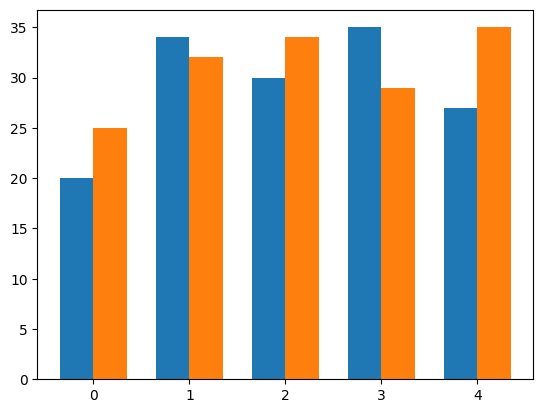

In [26]:
rects1 = plt.bar(x - width/2, men_means, width)
rects2 = plt.bar(x + width/2, women_means, width)

**¿Cómo sería si tuviésemos más de dos barras, que tendría que cambiar en las ecuaciones para poder modificar los valores de $X$?**

Una alternativa a los gráficos de barras proyectados lado a lado, son los gráficos de barras apilados. Para hacer esto, solo tenemos que pasar el parámetro `bottom` el cual corresponde a una lista, y nos permite modificar el origen de la barra a pintar.

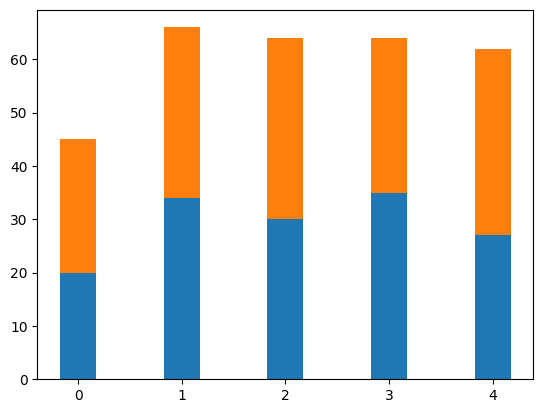

In [27]:
rects1 = plt.bar(x, men_means, width)
# En este caso, solo lo hacemos para la segunda barra, y que estas partan desde los valores de men_means
rects2 = plt.bar(x, women_means, width, bottom=men_means)

Finalmente, podemos añadir la legenda utilizando cualquiera de los dos métodos vistos anteriormente

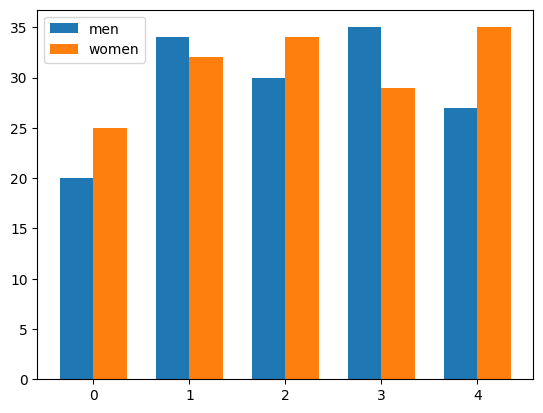

In [28]:
rects1 = plt.bar(x - width/2, men_means, width)
rects2 = plt.bar(x + width/2, women_means, width)
plt.legend(["men","women"])
plt.show()

Como podrán haber visto, el eje X de nuestro gráfico tiene valores numéricos (debido a que la variable `x = np.arange(len(labels))`). Nosotros podemos modificar esto, utilizando el método `plt.xticks()`, el cual recibe los valores de $X$, y luego etiquetas a mostrar para dichos valores de $X$.

A su vez, vamos a completar el gráfico modificando el título, y la etiqueta del eje Y. Para este último, utilizaremos el método `plt.ylabel()`


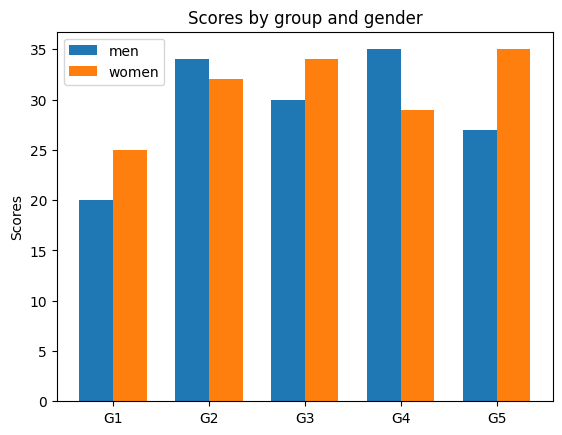

In [29]:
rects1 = plt.bar(x - width/2, men_means, width)
rects2 = plt.bar(x + width/2, women_means, width)
plt.legend(["men","women"])

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(x,labels)

plt.show()

## <font color='blue'>__Histogramas__</font>

Los histogramas son un caso específico de los gráficos de barras. Las diferencias entre los gráficos de barras y los histogramas, es que los primeros se utilizan para datos categóricos, mientras que los últimos para variables continuas. Los histogramas muestran una aproximación a la distribución de datos numéricos. Para este tipo de gráfico se generan las "cajas" (o "bins" en inglés) las cuales dividen todo el rango de posibles valores, en series de intervalos. Luego estos intervalos se llenan contando la cantidad de valores que están en dicho intervalo.

Para generar un histograma, necesitamos utilizar el método `plt.hist()`. Dicho método necesita como entrada los datos $X$, y un número de "bins" que se van a utilizar. Si este último número no especifica, entonces `plt.hist` generara por defecto 10 "bins".

[Documentación Histogramas](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)



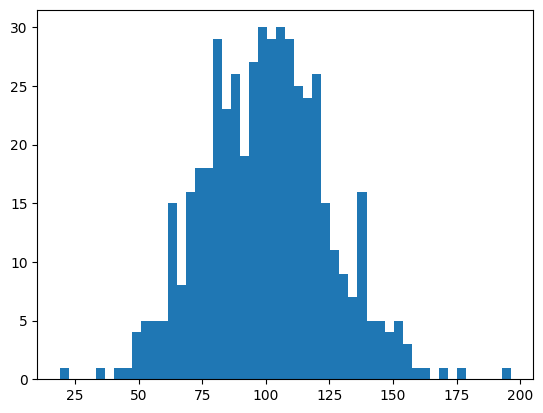

In [30]:
np.random.seed(42) # Fijamos la semilla aleatorea

mu = 100 # Definimos el parametro Mu
sigma = 25 # Definimos el parametro Sigma
X = np.random.normal(mu, sigma, 500) # Obtenemos 500 puntos de una distribución Normal con mu = 100 y sigma = 25

num_bins = 50 # Definimos la cantidad de cajas para nuestro histograma
n, bins, patches = plt.hist(X, num_bins)